In [3]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 16

# imageDataGenerator 를 이용해 이미지 데이터를 늘린다 


train_datagen = ImageDataGenerator(
    rotation_range=40, # 사진 돌리기
    width_shift_range=0.2, # 왼쪽 오른쪽으로 사진 움직이기
    height_shift_range=0.2, # 위 아래로 사진 움직이기
    rescale=1./255, # 이미지 픽셀 스케일링 
    shear_range=0.2, 
    zoom_range=0.2, # 랜덤하게 줌
    horizontal_flip=True, # 위 , 아래 오른쪽 왼쪽 뒤집기
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    rescale=1./255 # 이미지 스케일링
)

train_generator = train_datagen.flow_from_directory(
    './Dataset/train_set/',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    './Dataset/test_set/',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)



Found 436 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense


# cnn망 을 이용해 이미지 특징 추출 
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dense 망을 사용해 차원 축소 밑 데이터를 분류함
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['acc']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [5]:
model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
28/28 [==============================] - 30s 1s/step - loss: 0.6551 - acc: 0.6422 - val_loss: 0.6103 - val_acc: 0.5537
Epoch 2/10
28/28 [==============================] - 28s 1s/step - loss: 0.4107 - acc: 0.7913 - val_loss: 0.3435 - val_acc: 0.7603
Epoch 3/10
28/28 [==============================] - 28s 1s/step - loss: 0.4069 - acc: 0.8578 - val_loss: 0.2020 - val_acc: 0.9339
Epoch 4/10
28/28 [==============================] - 28s 996ms/step - loss: 0.2814 - acc: 0.8807 - val_loss: 0.1995 - val_acc: 0.9339
Epoch 5/10
28/28 [==============================] - 29s 1s/step - loss: 0.2722 - acc: 0.8807 - val_loss: 0.0755 - val_acc: 0.9752
Epoch 6/10
28/28 [==============================] - 32s 1s/step - loss: 0.2411 - acc: 0.8922 - val_loss: 0.1086 - val_acc: 0.9669
Epoch 7/10
28/28 [==============================] - 29s 1s/step - loss: 0.2828 - acc: 0.8968 - val_loss: 0.0519 - val_acc: 0.9835
Epoch 8/10
28/28 [==============================] - 28s 1s/step - loss: 0.2430 - acc: 0

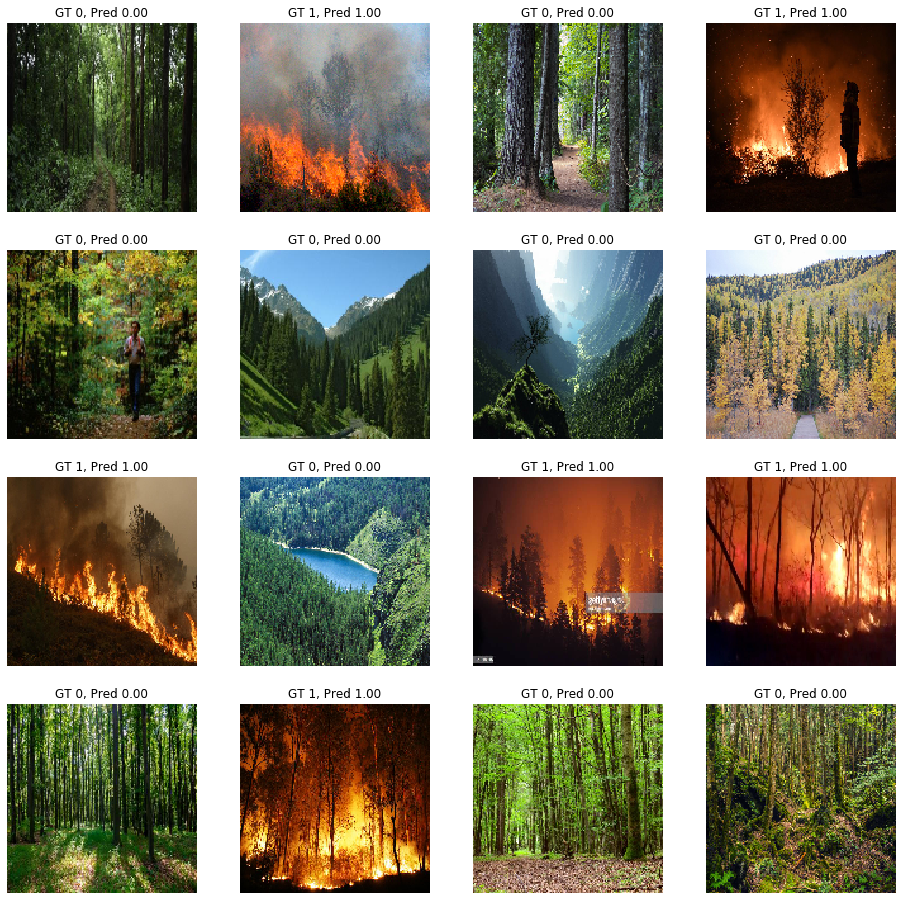

In [18]:
import matplotlib.pyplot as plt

val_imgs, val_labels = val_generator.__getitem__(0)

preds = model.predict_classes(val_imgs)

   

fig, axes = plt.subplots(4, 4, figsize=(16, 16))

for img, label, pred, ax in zip(val_imgs, val_labels, preds, axes.flatten()):
    ax.imshow(img)
    ax.set_title('GT %d, Pred %.2f' % (label, pred)) # 예상결과 , 예측값(확률값)
    ax.set_axis_off()
    

